Harmonized dataset preview:


,study_id,drug,subject_id,age_years,age_days,weight_kg,cl_l_per_h_per_kg,t_half_h,route,aggregated_row,...,cl_ml_per_min_per_kg,cl_l_per_h,cmin_ng_per_ml,visit,dose_mg,auc_mg_h_per_l,cmax_mg_per_l,route_harmonized,pathway,pathway_harmonized
0,vet_et_al_2014_agg,midazolam,NaN,0.006,2.2,2.5,0.140,NaN,iv,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,CYP3A4 hepatic metabolism,hepatic_CYP3A4
1,vet_et_al_2014_agg,midazolam,NaN,2.000,730.0,12.0,0.280,NaN,iv,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,CYP3A4 hepatic metabolism,hepatic_CYP3A4
2,morph_iv_surgery_1998_agg,morphine,morph_1998_1_1,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7
3,morph_iv_surgery_1998_agg,morphine,morph_1998_1_2,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7
4,morph_iv_surgery_1998_agg,morphine,morph_1998_1_3,0.005,NaN,NaN,0.552,NaN,iv,True,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,intravenous,UGT2B7 hepatic metabolism,hepatic_UGT2B7


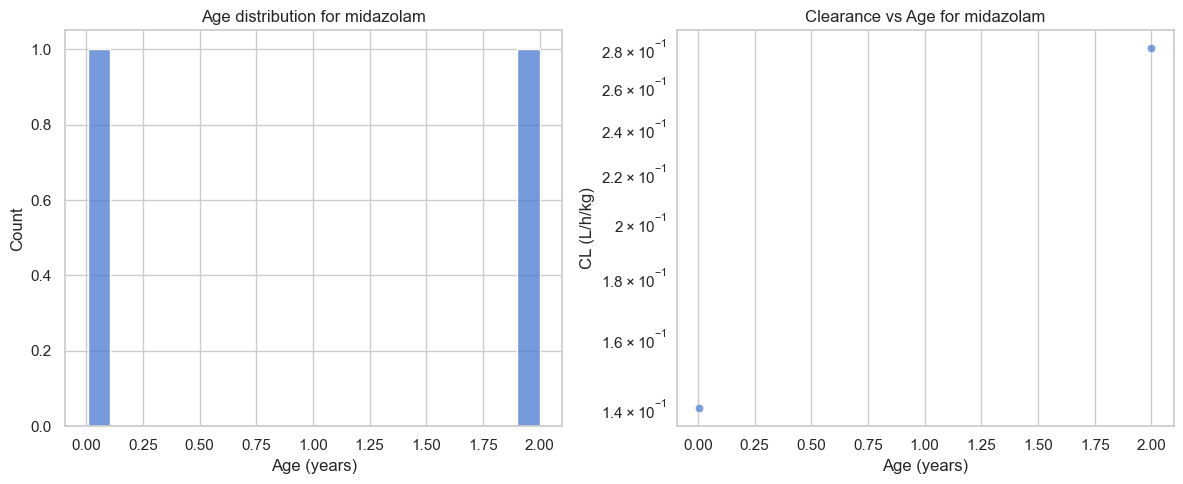

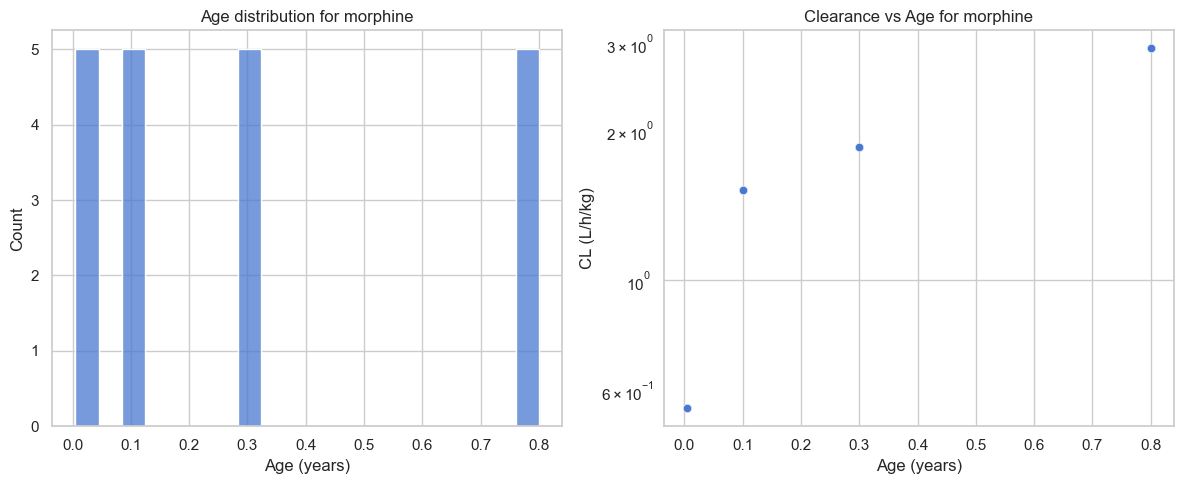

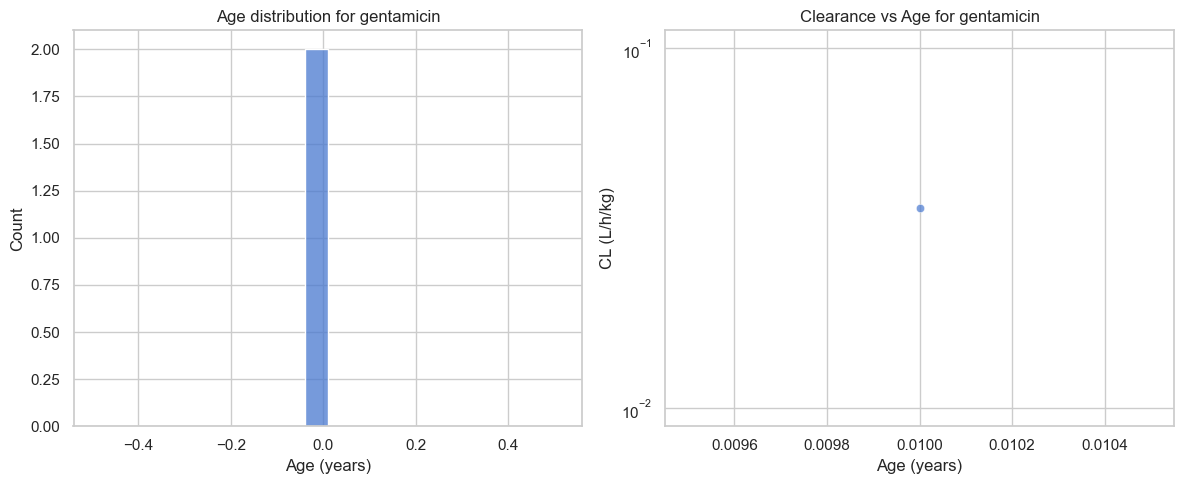

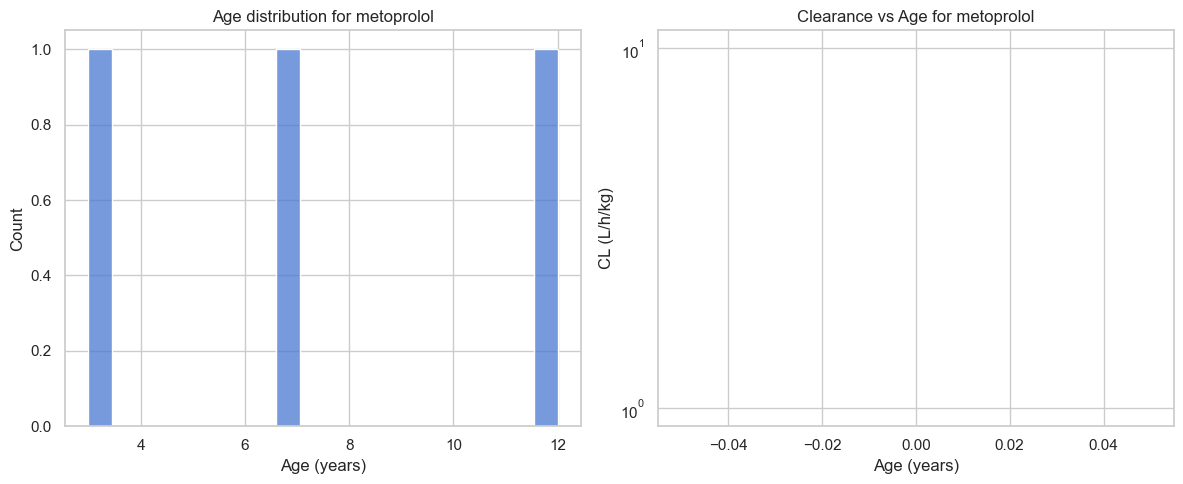

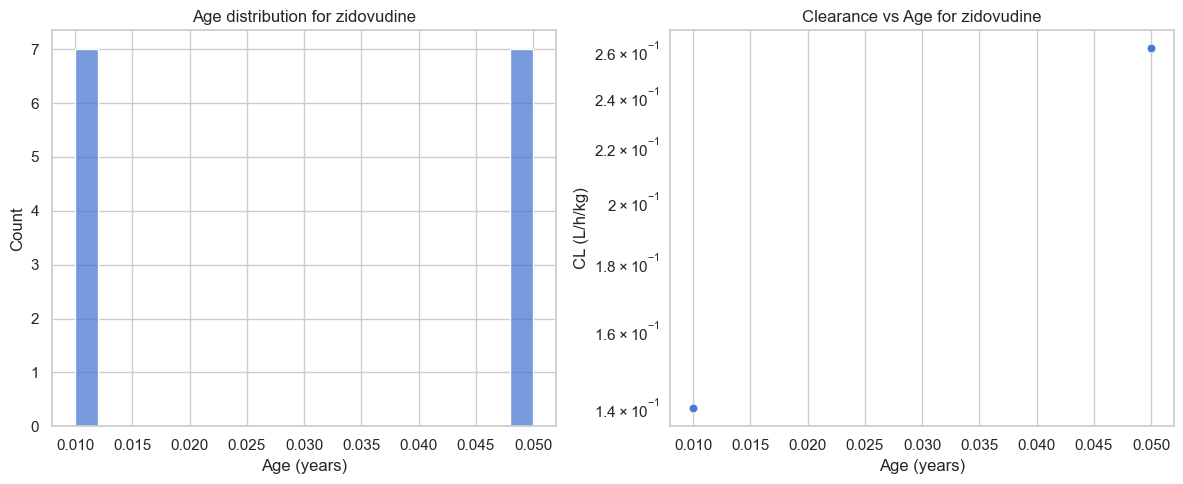

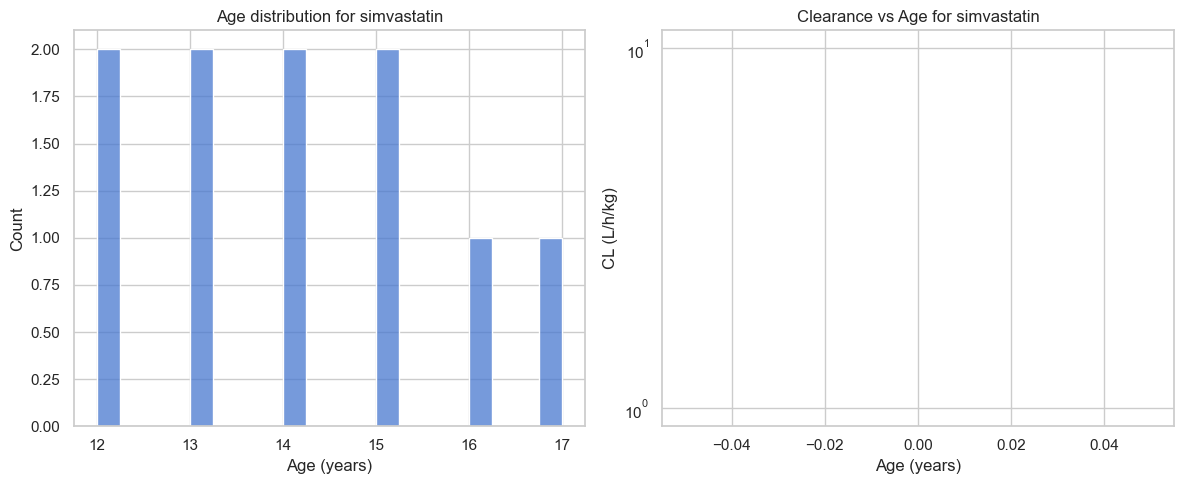

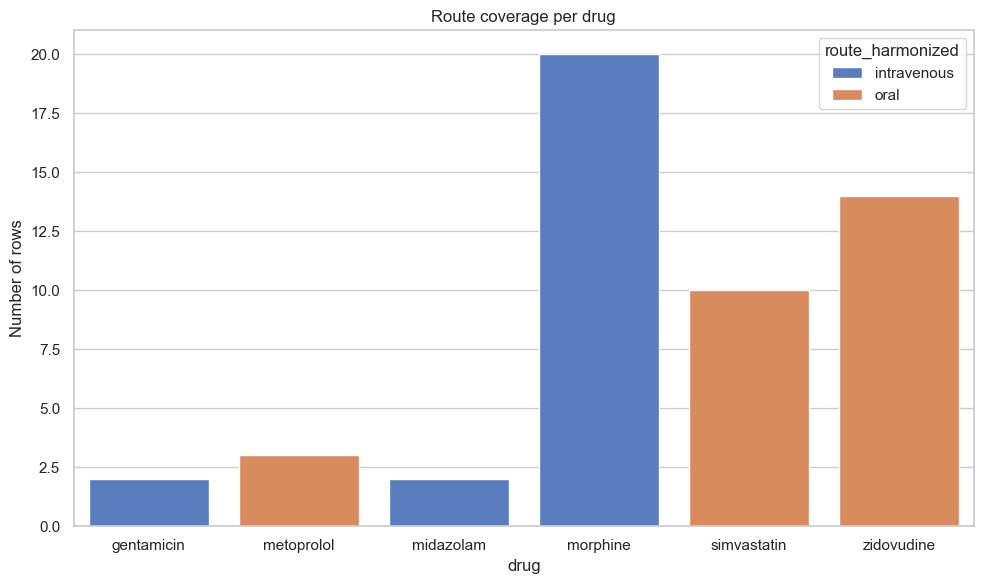

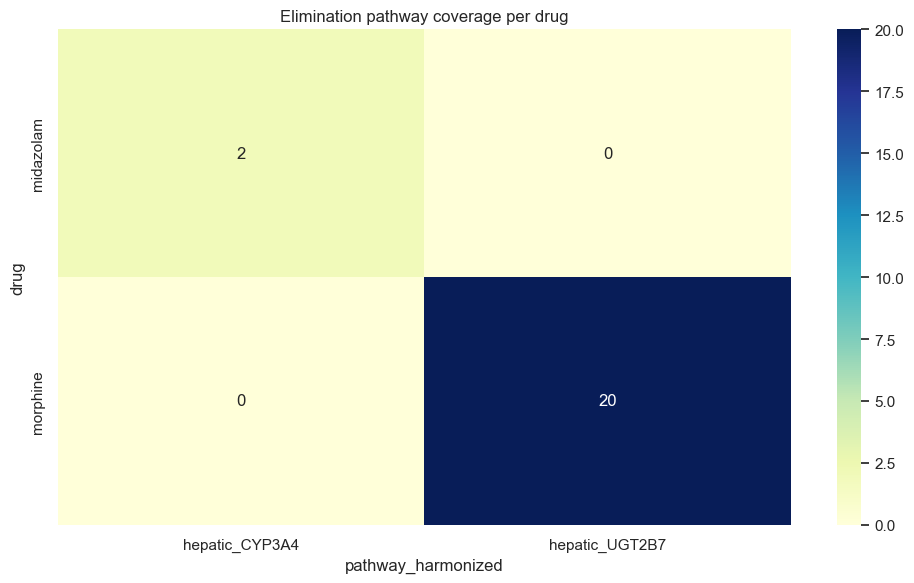

In [1]:
# 3_generate_figures.ipynb
# Notebook version of 3_generate_figures.py for JupyterLab

# ----------------------------------
# 1. Import libraries
# ----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid', palette='muted')

# ----------------------------------
# 2. Load harmonized dataset
# ----------------------------------
HARMONIZED_FILE = '/data/curated/pediatric_pk_master_harmonized.csv'
df = pd.read_csv(HARMONIZED_FILE)
print('Harmonized dataset preview:')
display(df.head())

# ----------------------------------
# 3. Age distribution and clearance vs age per drug
# ----------------------------------
for drug in df['drug'].unique():
    data = df[df['drug'] == drug]
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    
    # Age distribution
    sns.histplot(data=data, x='age_years', bins=20, ax=axs[0])
    axs[0].set_title(f'Age distribution for {drug}')
    axs[0].set_xlabel('Age (years)')
    axs[0].set_ylabel('Count')
    
    # Clearance vs age
    if 'cl_l_per_h_per_kg' in data.columns:
        sns.scatterplot(data=data, x='age_years', y='cl_l_per_h_per_kg', ax=axs[1], alpha=0.7)
        axs[1].set_yscale('log')
        axs[1].set_title(f'Clearance vs Age for {drug}')
        axs[1].set_xlabel('Age (years)')
        axs[1].set_ylabel('CL (L/h/kg)')
    plt.tight_layout()
    plt.show()

# ----------------------------------
# 4. Route coverage per drug
# ----------------------------------
route_counts = df.groupby(['drug','route_harmonized']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.barplot(data=route_counts, x='drug', y='count', hue='route_harmonized')
plt.title('Route coverage per drug')
plt.ylabel('Number of rows')
plt.tight_layout()
plt.show()

# ----------------------------------
# 5. Elimination pathway heatmap
# ----------------------------------
pathway_counts = pd.crosstab(df['drug'], df['pathway_harmonized'])
plt.figure(figsize=(10,6))
sns.heatmap(pathway_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Elimination pathway coverage per drug')
plt.tight_layout()
plt.show()

# ----------------------------------
# 6. Optional: Save figures to folder
# ----------------------------------
FIG_DIR = '/figures'
os.makedirs(FIG_DIR, exist_ok=True)
# Example: plt.savefig(os.path.join(FIG_DIR, 'route_coverage.png'))
